VERIFICATION DE LA NATURE DES DONNEE


--- Analyse de la colonne : BME ---
count    40319.000000
mean        55.676207
std        117.842634
min          0.000000
25%          7.000000
50%          7.000000
75%          7.000000
max        474.000000
Name: BME, dtype: float64
Médiane : 7.0
Mode : 7
Asymétrie : 2.0345147740301055
Kurtosis : 2.208586891043283

Test de normalité (D'Agostino et Pearson) p-value : 0.0
Distribution non normale

Nombre de valeurs uniques : 180


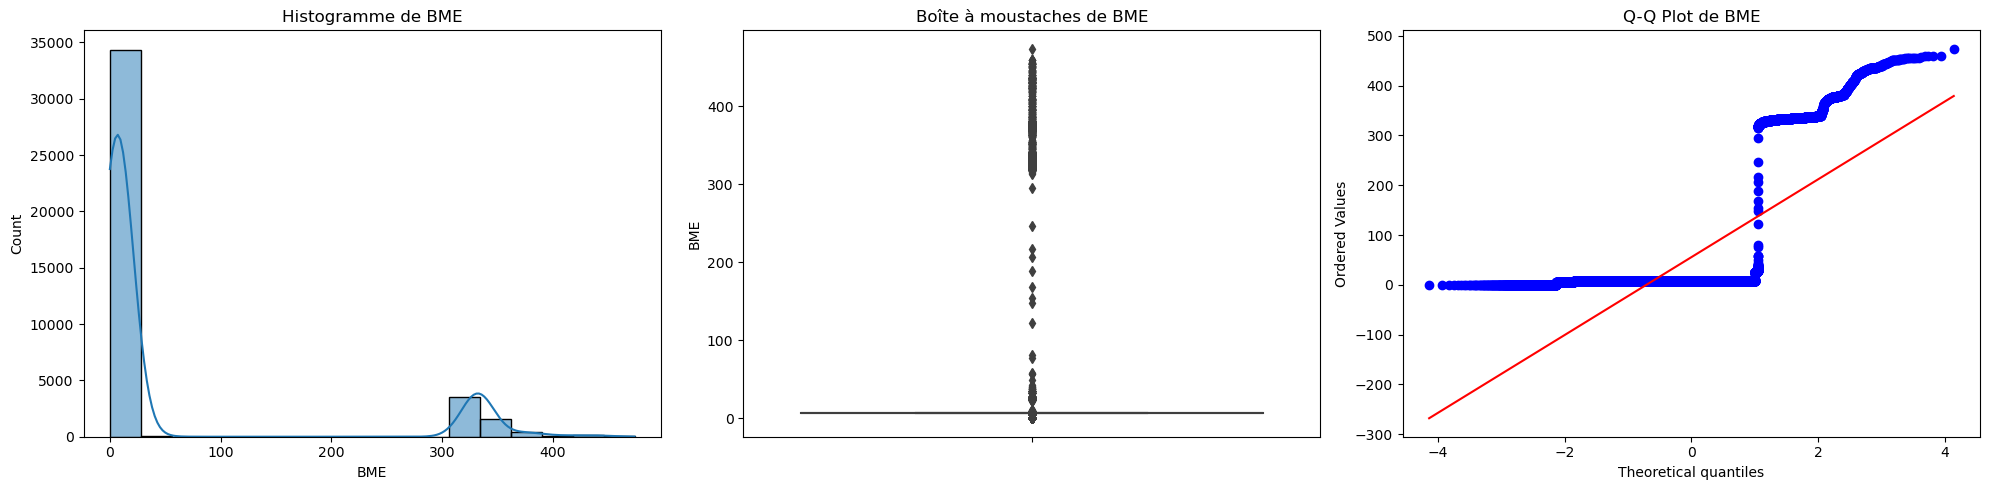


--- Analyse de la colonne : DWE ---
count    40319.000000
mean        15.771373
std        104.412350
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        800.000000
Name: DWE, dtype: float64
Médiane : 0.0
Mode : 0
Asymétrie : 6.759762944408783
Kurtosis : 44.26011455309648

Test de normalité (D'Agostino et Pearson) p-value : 0.0
Distribution non normale

Nombre de valeurs uniques : 157


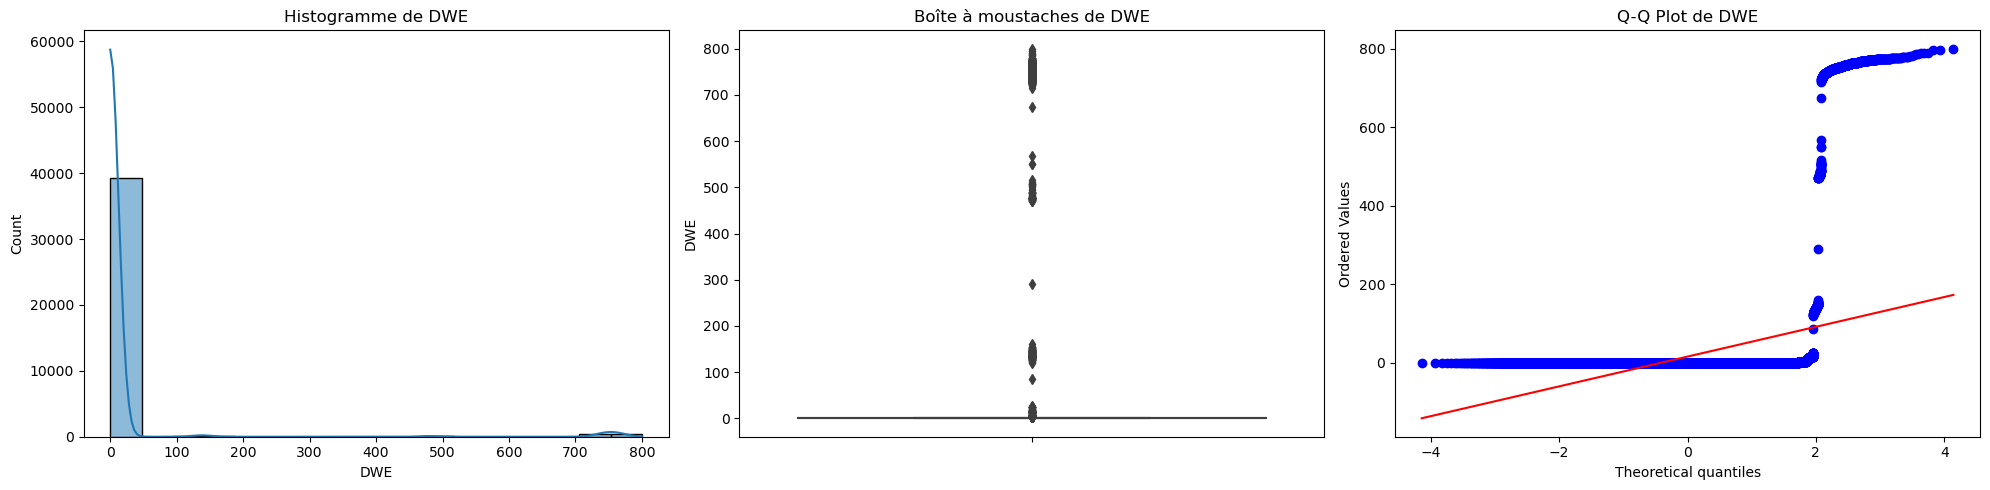


--- Analyse de la colonne : HPE ---
count    40319.000000
mean       306.027778
std        637.120553
min          0.000000
25%         36.000000
50%         37.000000
75%         38.000000
max       3029.000000
Name: HPE, dtype: float64
Médiane : 37.0
Mode : 37
Asymétrie : 1.9073599551858083
Kurtosis : 1.689390698645255

Test de normalité (D'Agostino et Pearson) p-value : 0.0
Distribution non normale

Nombre de valeurs uniques : 530


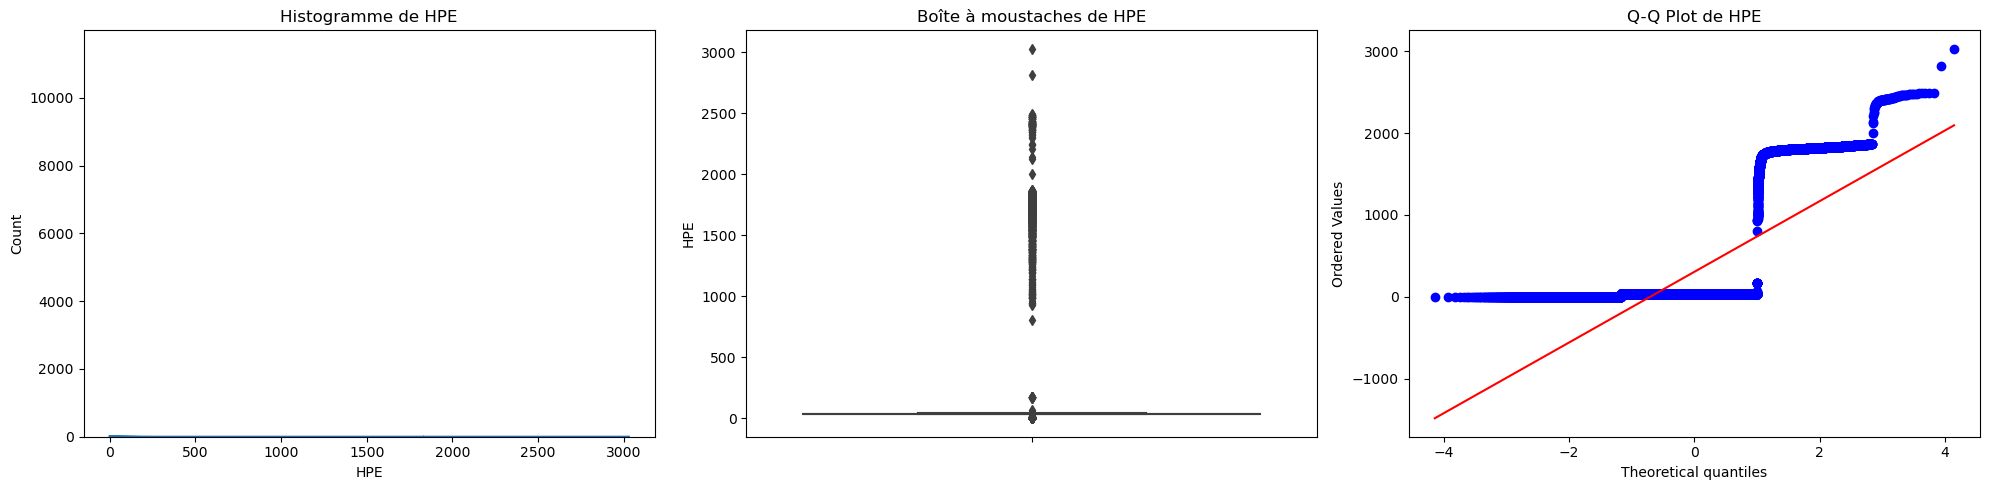


--- Analyse de la colonne : FGE ---
count    40319.000000
mean        47.106773
std         70.379761
min          0.000000
25%          0.000000
50%          1.000000
75%        126.000000
max       1418.000000
Name: FGE, dtype: float64
Médiane : 1.0
Mode : 0
Asymétrie : 3.034174074735183
Kurtosis : 34.19378181257467

Test de normalité (D'Agostino et Pearson) p-value : 0.0
Distribution non normale

Nombre de valeurs uniques : 173


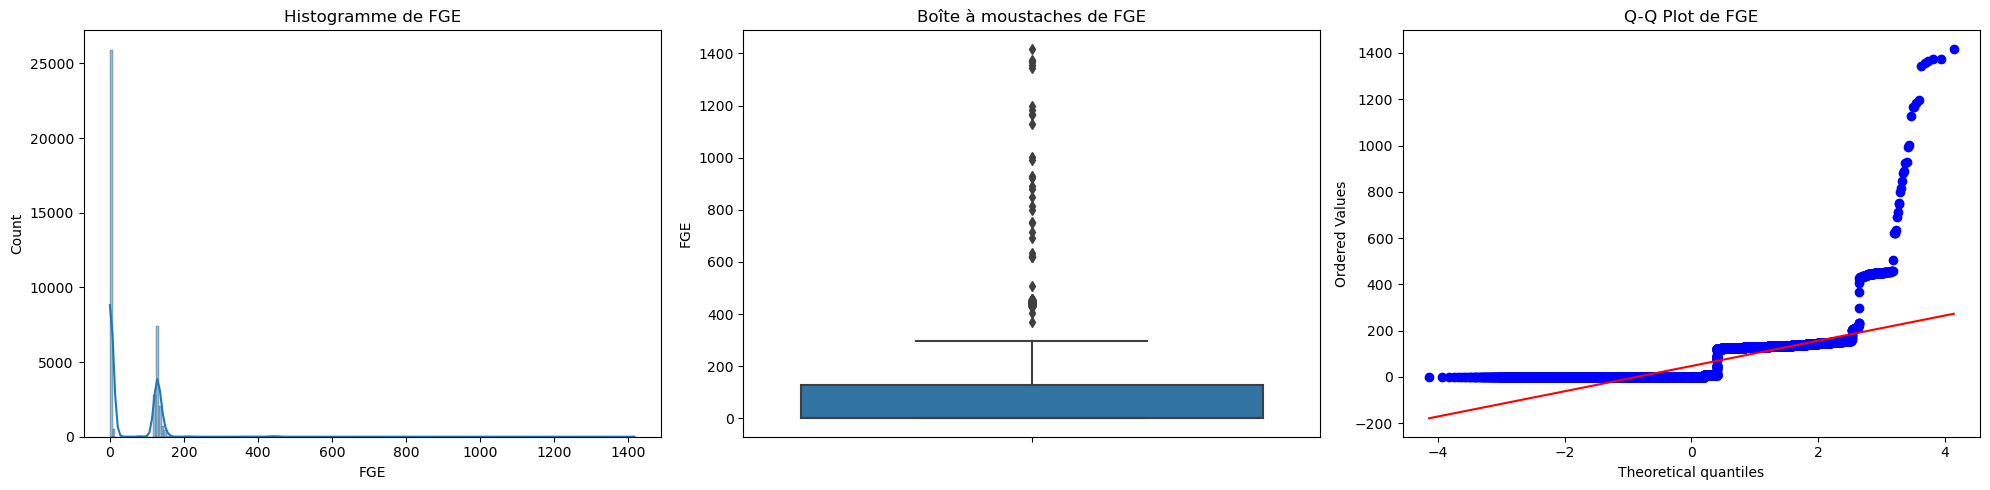


--- Analyse de la colonne : UTE ---
count    40319.000000
mean        16.837099
std         16.254684
min          8.000000
25%          9.000000
50%          9.000000
75%          9.000000
max         52.000000
Name: UTE, dtype: float64
Médiane : 9.0
Mode : 9
Asymétrie : 1.5933582162321085
Kurtosis : 0.5411132865964414

Test de normalité (D'Agostino et Pearson) p-value : 0.0
Distribution non normale

Nombre de valeurs uniques : 8


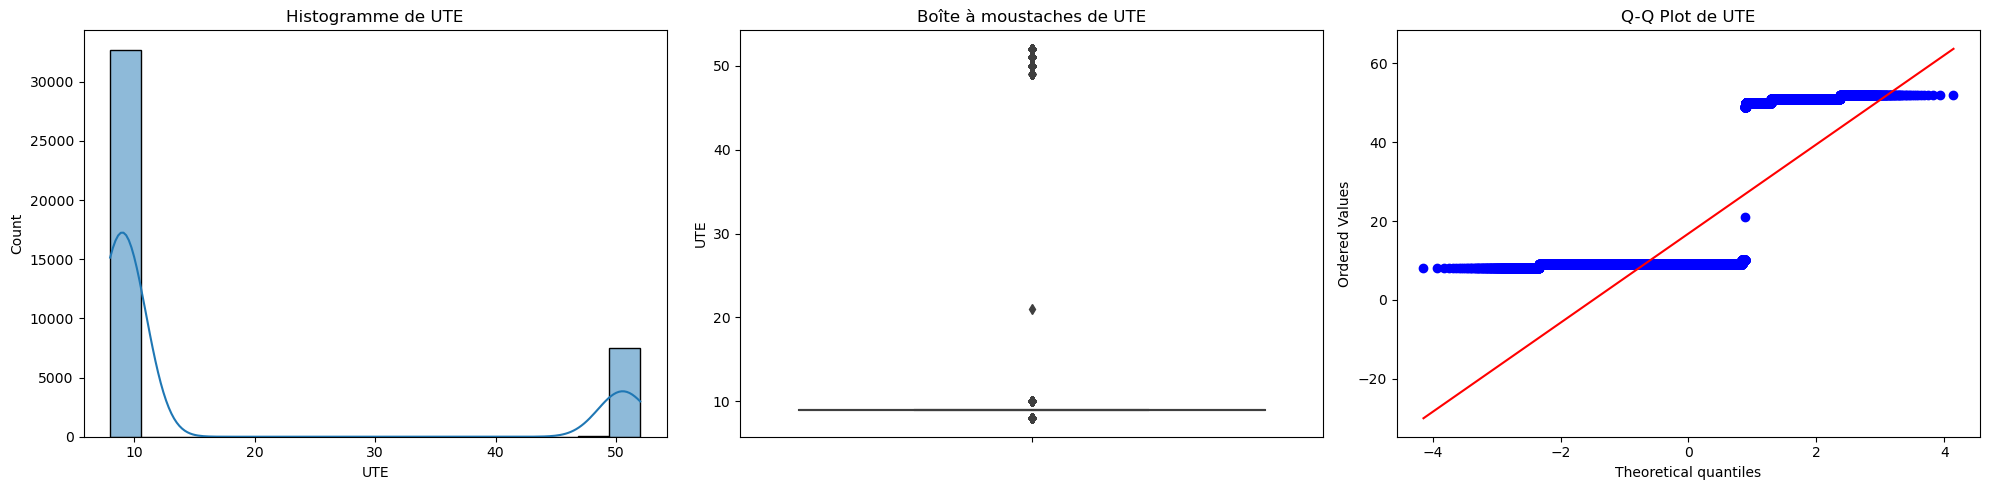

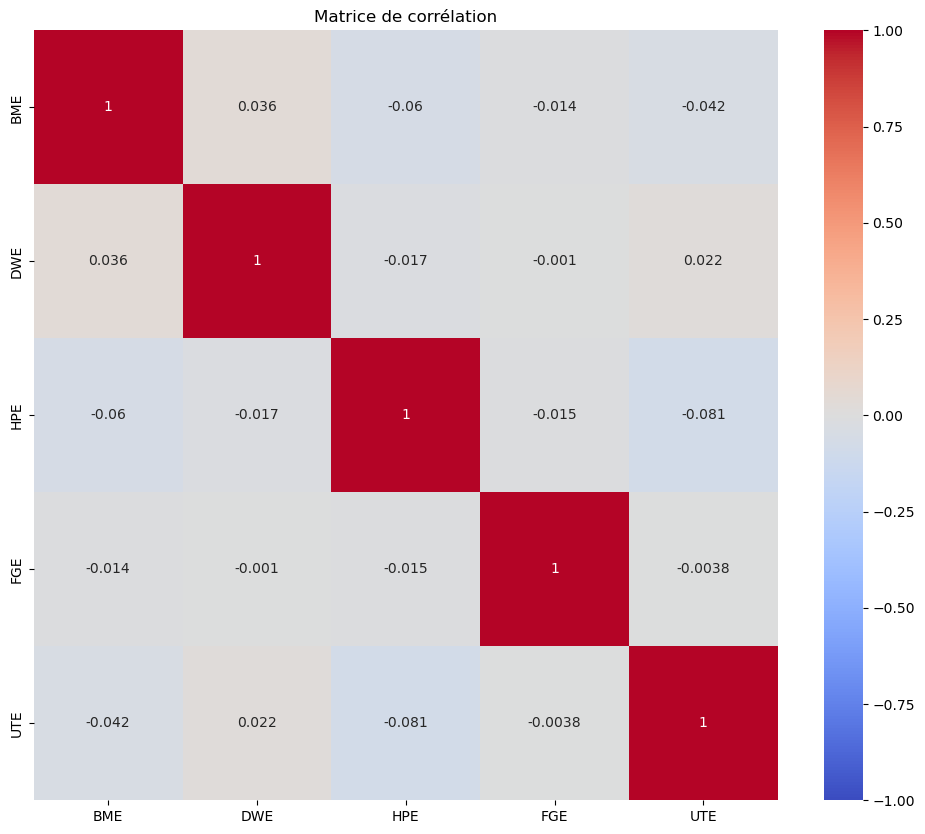

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Charger les données
df = pd.read_csv('ampds.csv')

# Liste des colonnes que vous voulez analyser
colonnes_a_analyser = ['BME', 'DWE', 'HPE', 'FGE', 'UTE']  

def analyze_column(column_name, data):
    print(f"\n--- Analyse de la colonne : {column_name} ---")
    
    # Statistiques descriptives
    print(data.describe())
    print(f"Médiane : {data.median()}")
    print(f"Mode : {data.mode().values[0]}")
    print(f"Asymétrie : {stats.skew(data)}")
    print(f"Kurtosis : {stats.kurtosis(data)}")
    
    # Test de normalité
    _, p_value = stats.normaltest(data)
    print(f"\nTest de normalité (D'Agostino et Pearson) p-value : {p_value}")
    print("Distribution normale" if p_value > 0.05 else "Distribution non normale")
    
    # Valeurs uniques
    unique_values = data.nunique()
    print(f"\nNombre de valeurs uniques : {unique_values}")
    
    # Visualisations
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
    
    # Histogramme
    sns.histplot(data, kde=True, ax=ax1)
    ax1.set_title(f"Histogramme de {column_name}")
    
    # Boîte à moustaches
    sns.boxplot(y=data, ax=ax2)
    ax2.set_title(f"Boîte à moustaches de {column_name}")
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=ax3)
    ax3.set_title(f"Q-Q Plot de {column_name}")
    
    plt.tight_layout()
    plt.show()

# Analyser seulement les colonnes spécifiées
for column in colonnes_a_analyser:
    if column in df.columns:
        analyze_column(column, df[column])
    else:
        print(f"La colonne '{column}' n'existe pas dans le dataset.")

# Matrice de corrélation pour les colonnes sélectionnées
corr_matrix = df[colonnes_a_analyser].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Matrice de corrélation")
plt.show()

In [ ]:
from hdbscan import HDBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Supposons que vos données sont dans un array numpy appelé 'data'
data = df['DWE'].values.reshape(-1, 1)

# Appliquer HDBSCAN
clusterer = HDBSCAN(min_cluster_size=50, min_samples=5)
cluster_labels = clusterer.fit_predict(data)

# Visualiser les résultats
plt.figure(figsize=(10, 5))
plt.scatter(range(len(data)), data, c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering HDBSCAN des données DWE')
plt.xlabel('Index des données')
plt.ylabel('Valeur DWE')
plt.colorbar(label='Cluster')
plt.show()

# Afficher les statistiques pour chaque cluster
for cluster in set(cluster_labels):
    if cluster != -1:  # -1 est le label pour le bruit
        cluster_data = data[cluster_labels == cluster]
        print(f"Cluster {cluster}:")
        print(f"  Nombre de points: {len(cluster_data)}")
        print(f"  Moyenne: {np.mean(cluster_data):.2f}")
        print(f"  Écart-type: {np.std(cluster_data):.2f}")
        print(f"  Min: {np.min(cluster_data):.2f}, Max: {np.max(cluster_data):.2f}")
        print()